# SPXQuery Quickstart Demo

This notebook demonstrates the flexible, resumable pipeline features of the `spxquery` package.

**Point Source:** Cloverleaf quasar (RA=213.9427080°, Dec=+11.4953890°, z=2.56)
**Aperture:** 2 pixel diameter

## Features Demonstrated

1. **One-click pipeline execution** - Run everything with a single function call
2. **Resumable pipeline** - Automatically resume from interruptions
3. **Manual step execution** - Run individual stages with dependency checking
4. **Flexible pipeline configuration** - Customize which stages to run
5. **Download control** - Skip existing files or force re-download

In [1]:
# Import required modules
from pathlib import Path

from spxquery import QueryConfig, Source, SPXQueryPipeline
from spxquery.core.pipeline import run_pipeline
from spxquery.utils.helpers import setup_logging

# Set up logging
setup_logging("INFO")

## One-Click Pipeline Execution

The simplest way to use `spxquery` - run everything with one function call.

This example shows frequently-used parameters with their default values.

### SPHEREx Bad Pixel Flags Reference

The `bad_flags` parameter specifies which pixel quality flags to reject during visualization.

**Default bad_flags: [0, 1, 2, 6, 7, 9, 10, 11, 15]**

| Flag Name    | Bit |
|--------------|-----|
| TRANSIENT    | 0   |
| OVERFLOW     | 1   |
| SUR_ERROR    | 2   |
| PHANTOM      | 4   |
| REFERENCE    | 5   |
| NONFUNC      | 6   |
| DICHROIC     | 7   |
| MISSING_DATA | 9   |
| HOT          | 10  |
| COLD         | 11  |
| FULLSAMPLE   | 12  |
| PHANMISS     | 14  |
| NONLINEAR    | 15  |
| PERSIST      | 17  |
| OUTLIER      | 19  |
| SOURCE       | 21  |

**Note:** The FLAGS extension in SPHEREx FITS files uses a bitmap where multiple flags can be set for a single pixel. The pipeline marks measurements as "bad" if ANY of the specified flag bits are set.

**Usage examples:**
```python
bad_flags=[0,1,2]              # Only reject saturated, bad pixels, hot pixels (relaxed)
bad_flags=[0,1,2,6,7,9,10,11,15]  # Default: comprehensive quality control
bad_flags=[]                   # No flag filtering (use all data)
```

2025-11-05 10:25:54 - spxquery.core.pipeline - INFO - Initialized pipeline for source at RA=213.942708, Dec=11.495389
2025-11-05 10:25:54 - spxquery.core.pipeline - INFO - Pipeline stages: ['query', 'download', 'processing', 'visualization']
2025-11-05 10:25:54 - spxquery.core.pipeline - INFO - State file: cloverleaf.json
2025-11-05 10:25:54 - spxquery.core.pipeline - INFO - Starting full pipeline execution
2025-11-05 10:25:54 - spxquery.core.pipeline - INFO - Pipeline stages: ['query', 'download', 'processing', 'visualization']
2025-11-05 10:25:54 - spxquery.core.pipeline - INFO - Running query stage
2025-11-05 10:25:54 - spxquery.core.query - INFO - Querying SPHEREx observations for source at RA=213.942708, Dec=11.495389
2025-11-05 10:25:58 - spxquery.core.query - INFO - Found 108 observations spanning 33.1 days
2025-11-05 10:25:58 - spxquery.core.pipeline - INFO - Marked stage 'query' as complete
2025-11-05 10:25:58 - spxquery.core.pipeline - INFO - Saved pipeline state: stage=downl


SPHEREx Archive Search Results
Source: RA=213.942708, Dec=11.495389
        Name: cloverleaf
Query time: 2025-11-05 10:25:58

Total observations found: 108

Observations by band:
  D1 (0.75-1.09 μm):  18 observations
  D2 (1.10-1.62 μm):  18 observations
  D3 (1.63-2.41 μm):  18 observations
  D4 (2.42-3.82 μm):  18 observations
  D5 (3.83-4.41 μm):  18 observations
  D6 (4.42-5.00 μm):  18 observations

Time span: 33.1 days
Total data volume: 0.00 GB



Downloading:   0%|          | 0/108 [00:00<?, ?files/s]2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_1.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_1.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_2.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_2.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_3.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_3.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_4.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0062_4.fits - already exists
2025-11-05 10:25:58 - spxquery.core.download - INFO - Skipping 2025W25_1B_0178_1.fits - already exists
2025-11-05 10:25:5


Download Summary
Total files: 108
Successful: 108
Failed: 0
Total downloaded: 525.9 MB (0.51 GB)



Processing observations:   1%|          | 1/108 [00:01<02:09,  1.21s/files]Failed to calculate AB magnitude: unsupported format string passed to NoneType.__format__
Failed to extract photometry from demo_data/cloverleaf/data/D3/2025W25_1B_0062_4.fits: unsupported format string passed to NoneType.__format__
Failed to calculate AB magnitude: unsupported format string passed to NoneType.__format__
Failed to extract photometry from demo_data/cloverleaf/data/D6/2025W25_1B_0468_4.fits: unsupported format string passed to NoneType.__format__
Processing observations:  30%|██▉       | 32/108 [00:01<00:02, 33.12files/s]Failed to calculate AB magnitude: unsupported format string passed to NoneType.__format__
Failed to extract photometry from demo_data/cloverleaf/data/D5/2025W25_2A_0075_1.fits: unsupported format string passed to NoneType.__format__
Failed to calculate AB magnitude: unsupported format string passed to NoneType.__format__
Failed to extract photometry from demo_data/cloverleaf/data/


Light Curve Summary
Total observations: 103
Time span: 33.1 days
MJD range: 60842.27 - 60875.36
Wavelength range: 0.75 - 4.97 μm
Number of bands: 6
Upper limits: 0
Mean SNR: 22.7

Observations per band:
  D1: 17
  D2: 18
  D3: 17
  D4: 18
  D5: 16
  D6: 17



2025-11-05 10:26:00 - spxquery.visualization.plots - INFO - Sigma clipping: 103 -> 102 measurements (1 outliers removed)
2025-11-05 10:26:00 - spxquery.visualization.plots - INFO - Sigma clipping: 103 -> 102 measurements (1 outliers removed)
2025-11-05 10:26:01 - spxquery.visualization.plots - INFO - Saved combined plot to demo_data/cloverleaf/results/combined_plot.png
2025-11-05 10:26:01 - spxquery.core.pipeline - INFO - Marked stage 'visualization' as complete
2025-11-05 10:26:01 - spxquery.core.pipeline - INFO - Saved pipeline state: stage=complete, completed=['query', 'download', 'processing', 'visualization']
2025-11-05 10:26:01 - spxquery.core.pipeline - INFO - Visualization saved to demo_data/cloverleaf/results/combined_plot.png
2025-11-05 10:26:01 - spxquery.core.pipeline - INFO - Saved pipeline state: stage=complete, completed=['query', 'download', 'processing', 'visualization']
2025-11-05 10:26:01 - spxquery.core.pipeline - INFO - Pipeline execution complete


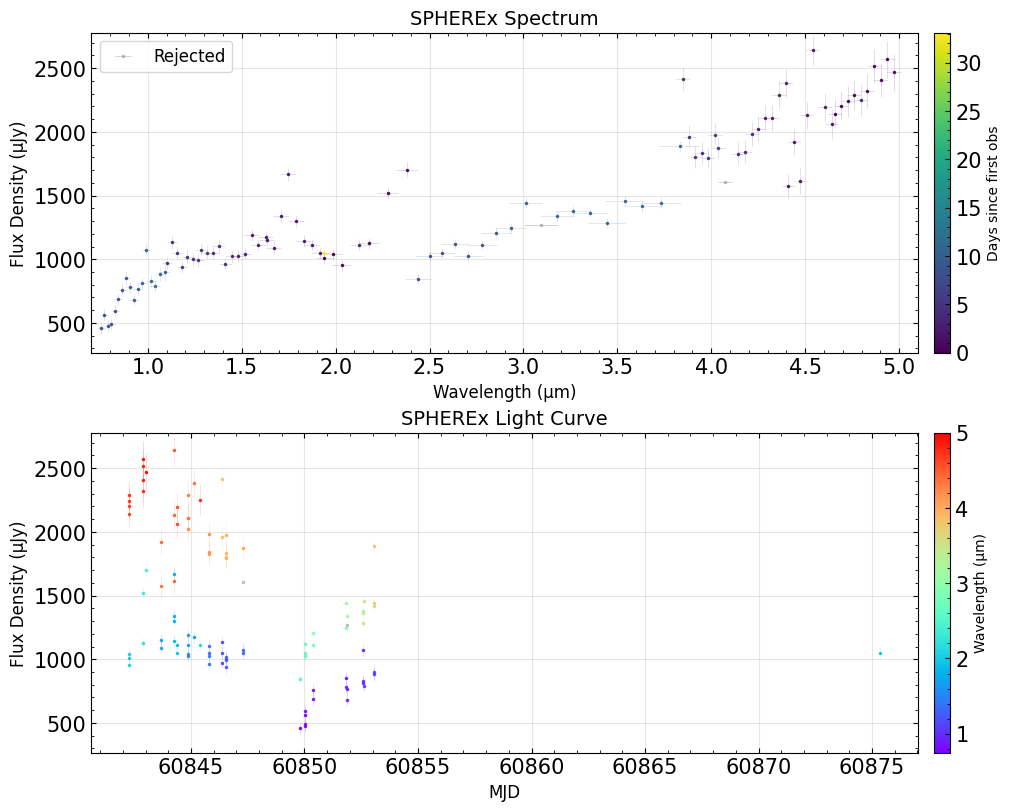

In [2]:
# Define output directory
output_dir = Path("demo_data/cloverleaf")

# Run complete pipeline with one function call
# Showing all frequently-used parameters with brief comments
run_pipeline(
    # === Source Parameters ===
    ra=213.9427080,  # Right ascension in degrees
    dec=11.4953890,  # Declination in degrees
    source_name="cloverleaf",  # Optional source name for labeling
    # === Output Settings ===
    output_dir=output_dir,  # Directory for data and results
    # === Photometry Settings ===
    aperture_diameter=2.0,  # Aperture diameter in pixels (default: 3.0)
    bands=["D1", "D2", "D3", "D4", "D5", "D6"],  # Bands to query (default: all ['D1'-'D6'])
    # === Download Settings ===
    cutout_size="60px",  # Cutout size (default: None = full image)
    # Examples: "200px", "5arcmin", "0.1" (degrees)
    max_download_workers=4,  # Parallel download threads (default: 4)
    max_processing_workers=10,  # Parallel processing workers (default: 10)
    # === Quality Control Settings ===
    sigma_threshold=5.0,  # Minimum SNR (flux/flux_err) for plotting (default: 5.0)
    bad_flags=[0, 1, 2, 6, 7, 9, 10, 11, 15],  # Bad pixel flags to reject (see above cell for definitions)
    # === Visualization Settings ===
    use_magnitude=False,  # If True, plot AB mag instead of flux (default: False)
    show_errorbars=True,  # Show error bars on plots (default: True)
    # === Pipeline Control ===
    resume=False,  # Resume from saved state (default: False)
    skip_existing_downloads=True,  # Skip already downloaded files (default: True)
    pipeline_stages=None,  # Custom stages list (default: all stages)
    # Example: ['query', 'download'] to skip processing
    # === Logging ===
    log_level="INFO",  # Logging verbosity: DEBUG, INFO, WARNING, ERROR
)

## Smart Resume - Automatic Configuration Loading

**NEW FEATURE**: The pipeline now automatically saves state to `{source_name}.json` and can load configuration with just 2 parameters:
1. `source_name` - The name of your source
2. `output_dir` - Where the data is stored

All other parameters (aperture, bands, cutout size, etc.) are automatically loaded from the saved state file!

**Priority order**: User-provided > Saved state > Defaults

In [3]:
# === SIMPLIFIED RESUME ===
# With the smart loading feature, you only need to specify:
# 1. Source name
# 2. Output directory
# Everything else is automatically loaded from {source_name}.json!

print("Creating pipeline with smart loading...")
print("Looking for saved state file: cloverleaf.json\n")

# Option A: Use QueryConfig.from_saved_state (RECOMMENDED for resume)
config = QueryConfig.from_saved_state(
    source_name="cloverleaf",
    output_dir=Path("demo_data/cloverleaf"),
    # All other parameters automatically loaded from cloverleaf.json!
    # Can override any parameter if needed, e.g.: aperture_diameter=5.0
)

if config._auto_loaded:
    print("✓ Configuration automatically loaded from saved state!")
else:
    print("ℹ No saved state found - using provided parameters and defaults")

# Create pipeline with the loaded configuration
pipeline_resumed = SPXQueryPipeline(config)

2025-11-05 10:26:10 - spxquery.core.pipeline - INFO - Initialized pipeline for source at RA=213.942708, Dec=11.495389
2025-11-05 10:26:10 - spxquery.core.pipeline - INFO - Pipeline stages: ['query', 'download', 'processing', 'visualization']
2025-11-05 10:26:10 - spxquery.core.pipeline - INFO - State file: cloverleaf.json


Creating pipeline with smart loading...
Looking for saved state file: cloverleaf.json

✓ Configuration automatically loaded from saved state!


In [4]:
# Display what was automatically loaded
print("\n" + "=" * 70)
print("AUTOMATICALLY LOADED CONFIGURATION")
print("=" * 70)
print(f"Source: {config.source.name}")
print(f"  RA: {config.source.ra:.6f}°")
print(f"  Dec: {config.source.dec:.6f}°")
print(f"\nAperture diameter: {config.aperture_diameter} pixels")
print(f"Bands: {config.bands}")
print(f"Cutout size: {config.cutout_size}")
print(f"Sigma threshold: {config.sigma_threshold}")
print(f"Bad flags: {config.bad_flags}")
print(f"Use magnitude: {config.use_magnitude}")
print(f"Show errorbars: {config.show_errorbars}")
print(f"Max download workers: {config.max_download_workers}")
print(f"Max processing workers: {config.max_processing_workers}")

# Load and display pipeline state
state_loaded = pipeline_resumed.load_state()

if state_loaded:
    print("\n" + "=" * 70)
    print("PIPELINE STATUS FROM SAVED STATE")
    print("=" * 70)
    pipeline_resumed.print_status()

    if pipeline_resumed.state.query_results:
        qr = pipeline_resumed.state.query_results
        print("\nQuery results:")
        print(f"  Total observations: {len(qr.observations)}")
        print(f"  Time span: {qr.time_span_days:.1f} days")
        print(f"  Total data size: {qr.total_size_gb:.2f} GB")
        print(f"  Band counts: {qr.band_counts}")

    print(f"\nDownloaded files: {len(pipeline_resumed.state.downloaded_files)}")
    print(f"Photometry results: {len(pipeline_resumed.state.photometry_results)}")
else:
    print("\n⚠ No pipeline state found yet. Run Example 1 first.")

2025-11-05 10:26:15 - spxquery.core.pipeline - INFO - Loaded pipeline state: stage=complete, completed=['query', 'download', 'processing', 'visualization']



AUTOMATICALLY LOADED CONFIGURATION
Source: cloverleaf
  RA: 213.942708°
  Dec: 11.495389°

Aperture diameter: 2.0 pixels
Bands: ['D1', 'D2', 'D3', 'D4', 'D5', 'D6']
Cutout size: 60px
Sigma threshold: 5.0
Bad flags: [0, 1, 2, 6, 7, 9, 10, 11, 15]
Use magnitude: False
Show errorbars: True
Max download workers: 4
Max processing workers: 10

PIPELINE STATUS FROM SAVED STATE

Pipeline Status:
  Completed stages: ['query', 'download', 'processing', 'visualization']
  Pending stages: None
  Current stage: complete


Query results:
  Total observations: 108
  Time span: 33.1 days
  Total data size: 0.51 GB
  Band counts: {'D1': 18, 'D2': 18, 'D3': 18, 'D4': 18, 'D5': 18, 'D6': 18}

Downloaded files: 108
Photometry results: 103


In [5]:
# Example: Load from saved state but change aperture diameter
config_override = QueryConfig.from_saved_state(
    source_name="cloverleaf",
    output_dir=Path("demo_data/cloverleaf"),
    aperture_diameter=5.0,  # Override: use 5 pixels instead of saved value
    sigma_threshold=3.0,  # Override: stricter quality control
)

print("Configuration with overrides:")
print(f"Source: {config_override.source.name}")
print(f"  RA: {config_override.source.ra:.6f}  Dec: {config_override.source.dec:.6f}")
print(f"  Aperture diameter: {config_override.aperture_diameter} pixels (overridden)")
print(f"  Sigma threshold: {config_override.sigma_threshold} (overridden)")
print(f"  Bands: {config_override.bands} (loaded from saved state)")
print(f"  Cutout size: {config_override.cutout_size} (loaded from saved state)")
print("\nPriority: user-provided > saved state > defaults")

Configuration with overrides:
Source: cloverleaf
  RA: 213.942708  Dec: 11.495389
  Aperture diameter: 5.0 pixels (overridden)
  Sigma threshold: 3.0 (overridden)
  Bands: ['D1', 'D2', 'D3', 'D4', 'D5', 'D6'] (loaded from saved state)
  Cutout size: 60px (loaded from saved state)

Priority: user-provided > saved state > defaults


### Overriding Saved Parameters (Optional)

You can override any saved parameter by providing it explicitly:

### Option A: One-Click Resume

The simplest way - let the pipeline automatically run all remaining stages.

In [6]:
# Uncomment to run one-click resume:
# pipeline_resumed.resume(skip_existing_downloads=True)
# print("\nFinal status after resume:")
# pipeline_resumed.print_status()

print("To use one-click resume, uncomment the lines above.")
print("This will automatically complete all remaining stages.")

To use one-click resume, uncomment the lines above.
This will automatically complete all remaining stages.


### Option B: Step-by-Step Manual Execution

Run each remaining stage manually for more control.

In [7]:
# Check what stages still need to be run
print("Checking which stages remain...")
print(f"\nCompleted stages: {pipeline_resumed.state.completed_stages}")
print(f"All pipeline stages: {pipeline_resumed.state.pipeline_stages}")

remaining = [s for s in pipeline_resumed.state.pipeline_stages if s not in pipeline_resumed.state.completed_stages]
print(f"\nRemaining stages: {remaining if remaining else 'None - all complete!'}")

Checking which stages remain...

Completed stages: ['query', 'download', 'processing', 'visualization']
All pipeline stages: ['query', 'download', 'processing', 'visualization']

Remaining stages: None - all complete!


In [8]:
# Step 1: Download (if not already completed)
if "download" in pipeline_resumed.state.completed_stages:
    print("✓ Download stage already completed. Skipping.")
else:
    print("\nRunning download stage...")
    pipeline_resumed.run_download(skip_existing=True)
    print("\n✓ Download complete!")
    pipeline_resumed.print_status()

✓ Download stage already completed. Skipping.


In [9]:
# Step 2: Processing (if not already completed)
if "processing" in pipeline_resumed.state.completed_stages:
    print("✓ Processing stage already completed. Skipping.")
else:
    print("\nRunning processing stage...")
    pipeline_resumed.run_processing()
    print("\n✓ Processing complete!")
    pipeline_resumed.print_status()

✓ Processing stage already completed. Skipping.


In [10]:
# Step 3: Visualization (if not already completed)
if "visualization" in pipeline_resumed.state.completed_stages:
    print("✓ Visualization stage already completed. Skipping.")
else:
    print("\nRunning visualization stage...")
    pipeline_resumed.run_visualization()
    print("\n✓ Visualization complete!")
    pipeline_resumed.print_status()

print("\n" + "=" * 70)
print("ALL STAGES COMPLETE!")
print("=" * 70)

✓ Visualization stage already completed. Skipping.

ALL STAGES COMPLETE!


## View Results

After running the pipeline, results are saved in the output directory.


Light curve plot:


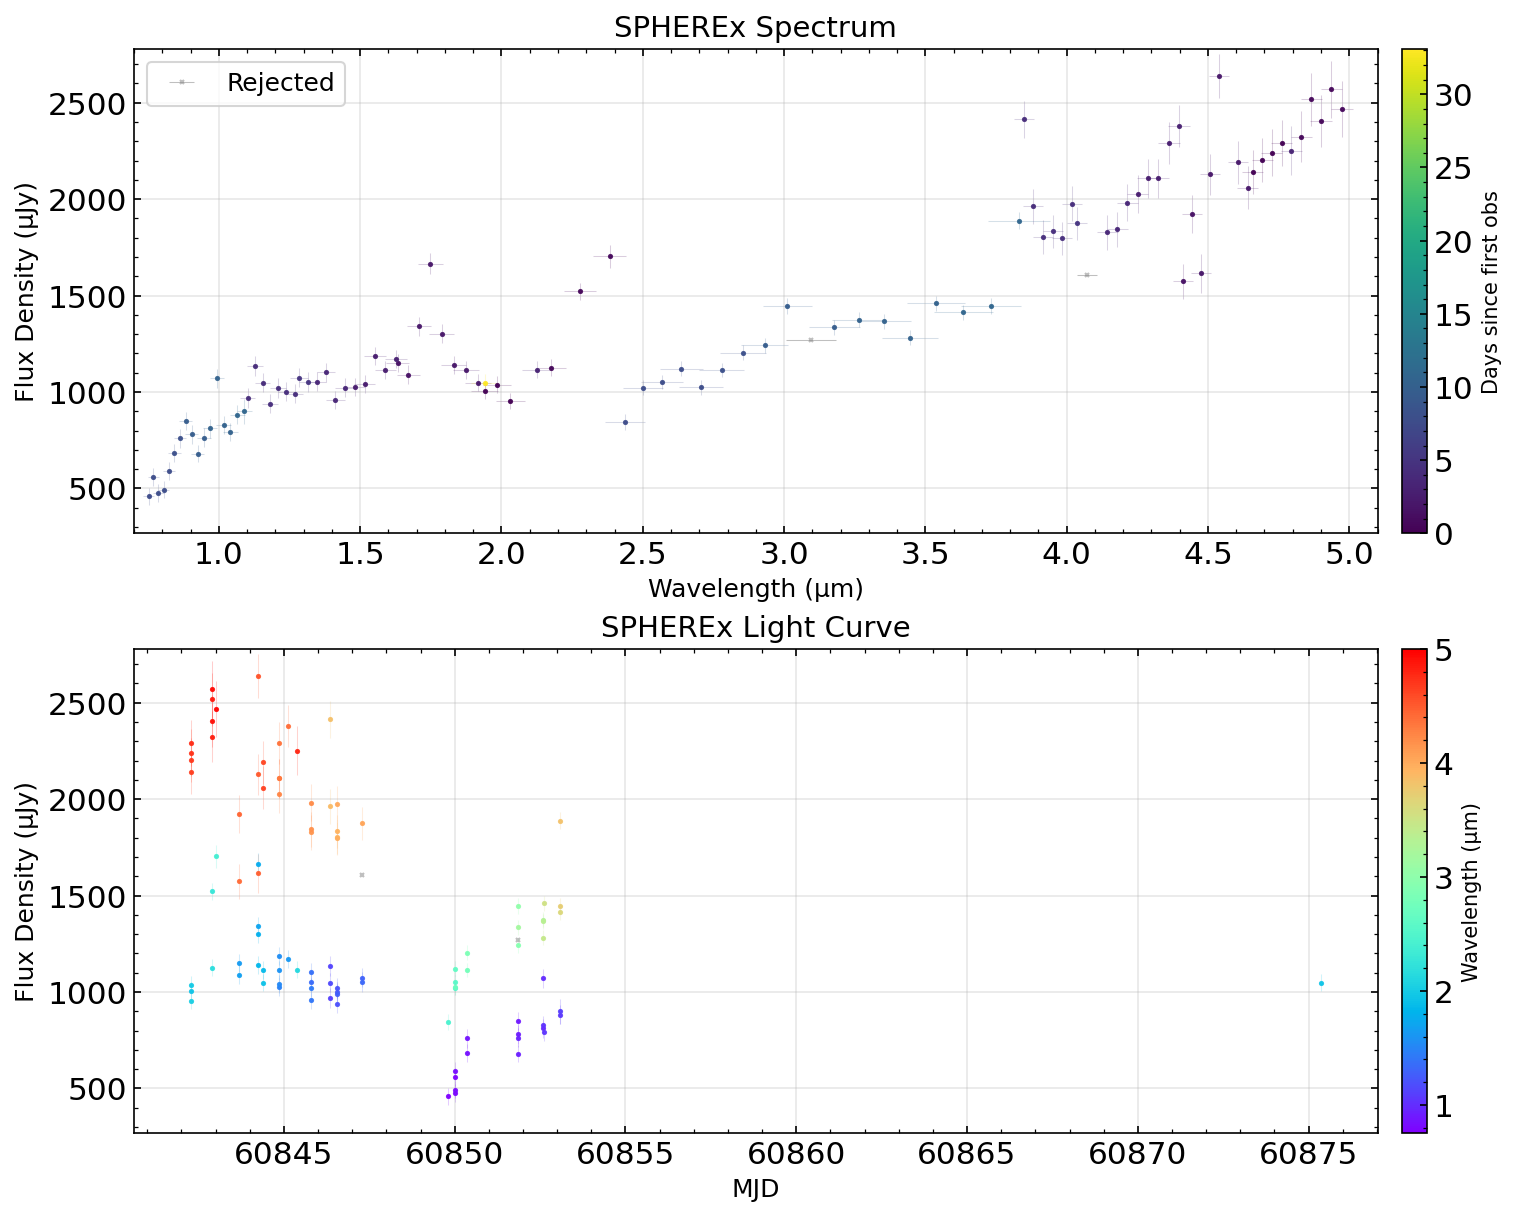

In [11]:
# Display the light curve plot
import pandas as pd
from IPython.display import Image, display

# Show plot from the one-click example
plot_path = output_dir / "results" / "combined_plot.png"
if plot_path.exists():
    print("\nLight curve plot:")
    display(Image(filename=str(plot_path)))
else:
    print(f"Plot not found at {plot_path}")

In [12]:
# Display the light curve data
csv_path = output_dir / "results" / "lightcurve.csv"
if csv_path.exists():
    df = pd.read_csv(csv_path, comment="#")
    print("\nLight curve data (first 10 rows):")
    display(df.head(10))
    print(f"\nTotal measurements: {len(df)}")
else:
    print(f"CSV not found at {csv_path}")


Light curve data (first 10 rows):


,obs_id,mjd,flux,flux_error,mag_ab,mag_ab_error,wavelength,bandwidth,band,flag,flag_binary,pix_x,pix_y,is_upper_limit,snr
0,2025W25_1B_0062_1,60842.269794,1007.005201,43.199265,16.392421,0.046577,1.940270,0.047790,D3,2097152,1000000000000000000000,29.226040,29.946309,False,23.310702
1,2025W25_1B_0062_1,60842.269794,2142.182081,113.169368,15.572859,0.057358,4.658078,0.036448,D6,2097152,1000000000000000000000,29.557889,29.859574,False,18.928992
2,2025W25_1B_0062_2,60842.271286,1037.453192,43.296935,16.360079,0.045312,1.984936,0.048890,D3,2097152,1000000000000000000000,29.228793,29.049005,False,23.961354
3,2025W25_1B_0062_2,60842.271286,2204.372156,115.065860,15.541788,0.056674,4.691950,0.036713,D6,2097152,1000000000000000000000,29.420567,29.979960,False,19.157482
4,2025W25_1B_0062_3,60842.272779,951.627230,41.846885,16.453833,0.047744,2.031681,0.050041,D3,2097152,1000000000000000000000,29.779715,29.163495,False,22.740695
5,2025W25_1B_0062_3,60842.272779,2240.633264,121.895272,15.524073,0.059066,4.726364,0.036983,D6,2097152,1000000000000000000000,29.694355,29.330708,False,18.381626
6,2025W25_1B_0062_4,60842.274271,2290.960471,119.457403,15.499956,0.056613,4.760819,0.037252,D6,2097152,1000000000000000000000,29.752959,29.544355,False,19.178054
7,2025W25_1B_0178_1,60842.882044,2324.691493,130.733326,15.484087,0.061058,4.830310,0.037796,D6,2097152,1000000000000000000000,29.663109,29.794504,False,17.781935
8,2025W25_1B_0178_1,60842.882044,1126.544575,42.342400,16.270629,0.040809,2.175510,0.053584,D3,2097152,1000000000000000000000,29.418622,29.210586,False,26.605591
9,2025W25_1B_0178_2,60842.883537,2517.327877,135.966100,15.397651,0.058643,4.865579,0.038072,D6,2097152,1000000000000000000000,29.427732,29.716646,False,18.514379



Total measurements: 103


## Advanced Configuration System

The advanced parameter system allows you to customize photometry, visualization, and download parameters beyond the basic pipeline settings.

**Key features:**
- Export default parameters to JSON template
- Edit parameters manually for fine-tuning
- Load custom parameters into pipeline
- Priority system: explicit params > JSON file > defaults

In [13]:
# Step 1: Export default parameters to a JSON template
from spxquery.utils.params import export_default_parameters

# Export to custom directory
params_file = export_default_parameters(output_dir / "config", filename="my_custom_params.json")

print(f"\nParameter template created at: {params_file}")

2025-11-05 10:26:28 - spxquery.utils.params - INFO - Default parameters exported to demo_data/cloverleaf/config/my_custom_params.json



Advanced Parameters Template Exported
File location: demo_data/cloverleaf/config/my_custom_params.json

This template contains customizable parameters for:
  • Photometry (aperture, background annulus, sigma clipping)
  • Visualization (colormaps, marker sizes, figure settings)
  • Downloads (chunk size, timeouts, retries)

NOTE: This template does NOT include source information (ra/dec).
      You must provide source coordinates when running the pipeline.

Next steps:
  1. Edit my_custom_params.json to customize parameters
  2. Use the file in your pipeline with:
     • QueryConfig(source=..., advanced_params_file='demo_data/cloverleaf/config/my_custom_params.json')
     • run_pipeline(ra=..., dec=..., advanced_params_file='demo_data/cloverleaf/config/my_custom_params.json')


Parameter template created at: demo_data/cloverleaf/config/my_custom_params.json


In [14]:
# Step 2: View the parameter structure
import json

with open(params_file) as f:
    params = json.load(f)

print("Parameter file structure:\n")
print(json.dumps(params, indent=2))

Parameter file structure:

{
  "photometry": {
    "annulus_inner_offset": 1.414,
    "min_annulus_area": 10,
    "max_outer_radius": 5.0,
    "min_usable_pixels": 10,
    "bg_sigma_clip_sigma": 3.0,
    "bg_sigma_clip_maxiters": 3,
    "zodi_scale_min": 0.0,
    "zodi_scale_max": 10.0,
    "pixel_scale_fallback": 6.2,
    "max_annulus_attempts": 5,
    "annulus_expansion_step": 0.5
  },
  "visualization": {
    "wavelength_cmap": "rainbow",
    "date_cmap": "viridis",
    "sigma_clip_sigma": 3.0,
    "sigma_clip_maxiters": 10,
    "ylim_percentile_min": 1.0,
    "ylim_percentile_max": 99.0,
    "ylim_padding_fraction": 0.1,
    "marker_size_good": 1.5,
    "marker_size_rejected": 2.0,
    "marker_size_upper_limit": 3.0,
    "errorbar_alpha": 0.2,
    "marker_alpha": 0.9,
    "errorbar_linewidth": 0.5,
    "figsize": [
      10,
      8
    ],
    "dpi": 150
  },
  "download": {
    "chunk_size": 8192,
    "timeout": 300,
    "max_retries": 3,
    "retry_delay": 5,
    "user_agent": "S

### Customize Parameters

You can now edit the JSON file to customize:

**Photometry parameters:**
- `annulus_inner_offset`: Gap between aperture and background annulus
- `bg_sigma_clip_sigma`: Background estimation sigma clipping threshold
- `pixel_scale_fallback`: Fallback pixel scale when WCS fails
- And more...

**Visualization parameters:**
- `wavelength_cmap`: Colormap for wavelength coding ("rainbow", "plasma", etc.)
- `date_cmap`: Colormap for date coding
- `figsize`: Figure dimensions [width, height]
- `dpi`: Resolution for saved figures
- And more...

**Download parameters:**
- `chunk_size`: Download chunk size in bytes
- `timeout`: HTTP timeout in seconds
- `max_retries`: Number of retry attempts

In [15]:
# Step 3: Modify parameters for your use case
# Example: Customize visualization for publication-quality plots

# Modify parameters
params["visualization"]["dpi"] = 300  # High resolution for publications
params["visualization"]["figsize"] = [7.5, 6]  # Journal column width
params["visualization"]["wavelength_cmap"] = "plasma"  # Different colormap

# Modify photometry for stricter background estimation
params["photometry"]["bg_sigma_clip_sigma"] = 2.5  # Stricter sigma clipping

# Save modified parameters
with open(params_file, "w") as f:
    json.dump(params, f, indent=2)

print("✓ Parameters customized and saved!")
print("\nModified parameters:")
print(f"  DPI: {params['visualization']['dpi']}")
print(f"  Figure size: {params['visualization']['figsize']}")
print(f"  Wavelength colormap: {params['visualization']['wavelength_cmap']}")
print(f"  Background sigma clipping: {params['photometry']['bg_sigma_clip_sigma']}")

✓ Parameters customized and saved!

Modified parameters:
  DPI: 300
  Figure size: [7.5, 6]
  Wavelength colormap: plasma
  Background sigma clipping: 2.5


### Use Custom Parameters in Pipeline

There are two ways to use custom parameters:

In [16]:
# Method 1: Using run_pipeline() function
print("Method 1: Using run_pipeline() with advanced_params_file")
print("=" * 70)

# Uncomment to run with custom parameters:
# run_pipeline(
#     ra=213.9427080,
#     dec=11.4953890,
#     source_name="cloverleaf_custom",
#     output_dir=Path("demo_data/cloverleaf_custom"),
#     aperture_diameter=2.0,
#     cutout_size="60px",
#     advanced_params_file=params_file,  # <-- Load custom parameters
#     log_level="INFO"
# )

print("To run pipeline with custom parameters, uncomment the code above.")
print(f"Custom parameters will be loaded from: {params_file}")

Method 1: Using run_pipeline() with advanced_params_file
To run pipeline with custom parameters, uncomment the code above.
Custom parameters will be loaded from: demo_data/cloverleaf/config/my_custom_params.json


In [17]:
# Method 2: Using QueryConfig with SPXQueryPipeline
print("\nMethod 2: Using QueryConfig with advanced_params_file")
print("=" * 70)

# Create source
source_custom = Source(ra=213.9427080, dec=11.4953890, name="cloverleaf_custom")

# Create configuration with custom parameters
config_custom = QueryConfig(
    source=source_custom,
    output_dir=Path("demo_data/cloverleaf_custom"),
    aperture_diameter=2.0,
    cutout_size="60px",
    advanced_params_file=params_file,  # <-- Load custom parameters
)

# Verify parameters were loaded
print("\n✓ Custom parameters loaded!")
print(f"  Visualization DPI: {config_custom.advanced.visualization.dpi}")
print(f"  Figure size: {config_custom.advanced.visualization.figsize}")
print(f"  Wavelength colormap: {config_custom.advanced.visualization.wavelength_cmap}")
print(f"  BG sigma clipping: {config_custom.advanced.photometry.bg_sigma_clip_sigma}")

# Create and run pipeline
# Uncomment to run:
# pipeline_custom = SPXQueryPipeline(config_custom)
# pipeline_custom.run_full_pipeline()

print("\nTo run pipeline, uncomment the last two lines above.")

2025-11-05 10:26:31 - spxquery.utils.params - INFO - Loaded advanced parameters from demo_data/cloverleaf/config/my_custom_params.json
2025-11-05 10:26:31 - spxquery.core.config - INFO - Loaded advanced parameters from demo_data/cloverleaf/config/my_custom_params.json



Method 2: Using QueryConfig with advanced_params_file

✓ Custom parameters loaded!
  Visualization DPI: 300
  Figure size: (7.5, 6)
  Wavelength colormap: plasma
  BG sigma clipping: 2.5

To run pipeline, uncomment the last two lines above.


### Parameter Priority System

The pipeline uses a three-tier priority system for all parameters:

**Priority order (highest to lowest):**
1. **Explicit function arguments** - Parameters passed directly to `run_pipeline()` or `QueryConfig()`
2. **JSON parameter file** - Parameters loaded from `advanced_params_file`
3. **Built-in defaults** - Default values in the code

**Example:**
```python
# If you have bg_sigma_clip_sigma=2.5 in your JSON file,
# but pass a different value explicitly:

config = QueryConfig(
    source=source,
    advanced_params_file="my_params.json",  # Contains bg_sigma_clip_sigma=2.5
)
# Result: Uses 2.5 from JSON file

# But if you override explicitly:
from spxquery.core.config import PhotometryConfig, AdvancedConfig
advanced = AdvancedConfig(photometry=PhotometryConfig(bg_sigma_clip_sigma=3.5))
config = QueryConfig(
    source=source,
    advanced=advanced  # Explicitly provided config
)
# Result: Uses 3.5 (explicit override wins)
```

This system allows you to:
- Set project-wide defaults in a JSON file
- Override specific parameters for individual runs
- Maintain reproducible analysis pipelines